In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
cancer = load_breast_cancer()

In [2]:
cancer.data.shape

(569, 30)

Count for each class

In [3]:
target = np.unique(cancer.target)
count_per_class = np.zeros(len(target),dtype = np.int64)
for types in range(len(target)):
    for index in range(len(cancer.target)):
        if cancer.target[index] == target[types]:
            count_per_class[types] += 1

In [4]:
"Sample count per class:{}".format({n:v for n,v in zip(cancer.target_names,count_per_class)})

"Sample count per class:{'malignant': 212, 'benign': 357}"

Split and train the KNN model

In [5]:
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state = 0)

In [6]:
print("The train ratio is: {}".format(x_train.shape[0]/cancer.data.shape[0]))
"The test ratio is: {}".format(x_test.shape[0]/cancer.data.shape[0])

The train ratio is: 0.7486818980667839


'The test ratio is: 0.2513181019332162'

In [7]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Prediction and visualization

In [8]:
print("Test set score: {:.2f}%".format(100*knn.score(x_test,y_test)))

Test set score: 92.31%


In [9]:
y_pred = knn.predict(x_test)
print("Test set prediction:\n{}".format(y_pred))

Test set prediction:
[0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [10]:
matrix = confusion_matrix(y_test,y_pred)
df = pd.DataFrame(matrix,columns = ['malignant','benign'])
df.head()

,malignant,benign
0,48,5
1,6,84


Text(33.0, 0.5, 'Truth')

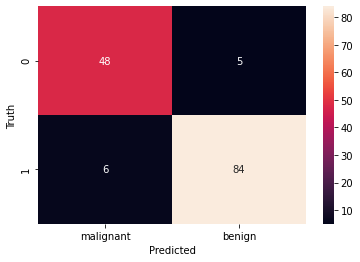

In [11]:
sns.heatmap(df,annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')